# 시각화

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

def bar_chart(feature):
    yes = train[train['voted']==1][feature].value_counts()
    no = train[train['voted']==2][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes','No']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [2]:
import pandas as pd

train=pd.read_csv('./train.csv')
test=pd.read_csv('./test_x.csv')

# 데이터 전처리

In [3]:
import numpy as np
train = train.drop(train[train.familysize > 10].index)
test = test.drop(test[test.familysize > 10].index)

# 원핫 인코딩 (gender, race, religion)

In [4]:
train=pd.get_dummies(train, columns=['race'])
train=pd.get_dummies(train, columns=['religion'])
train=pd.get_dummies(train, columns=['gender'])
test=pd.get_dummies(test, columns=['race'])
test=pd.get_dummies(test, columns=['religion'])
test=pd.get_dummies(test, columns=['gender'])

# Feature : Mach_score (마키아벨리니즘 스코어)

In [5]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

<AxesSubplot:>

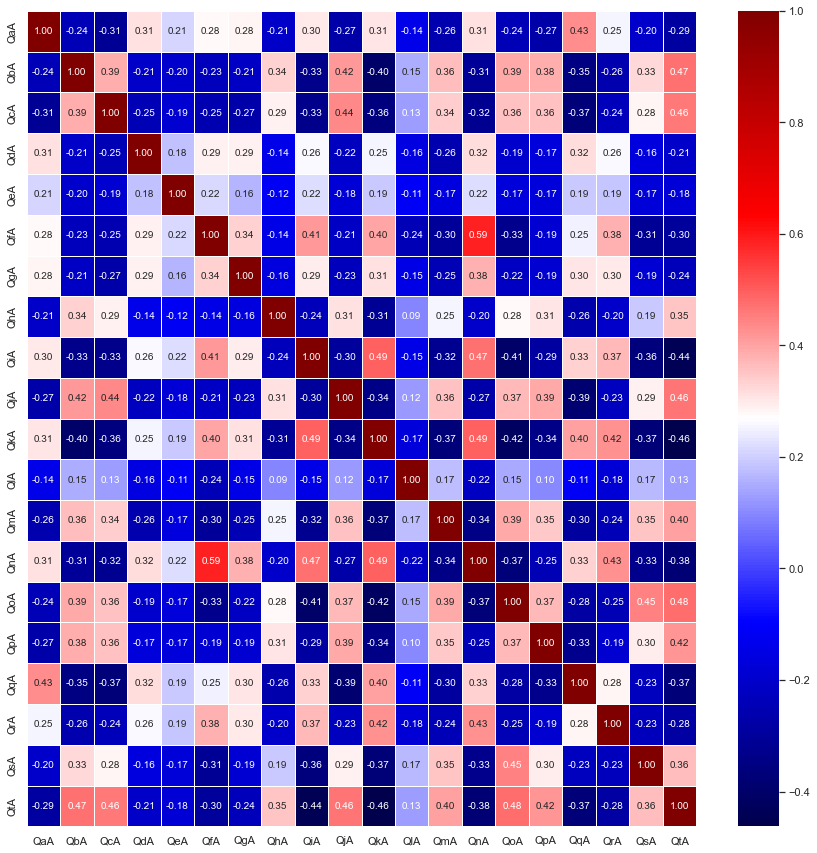

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data = train[Answers].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='seismic')

- 1. B를 기준으로 음수인것들 : A, D, E, F, G, I, K, L, N, Q, R
- 2. 문항이 Secret이 되어 있는 것들 : A, D, G, I, L, N, P, T
- 3. 1-2 를 한 나머지들 : E, F, K, Q, R
- 4. 음의 방향인 것들을 모두 양수로 바꿈

In [7]:
reverse = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for r in reverse: 
        train[r] = 6 - train[r]
        test[r] = 6 - test[r]

<AxesSubplot:>

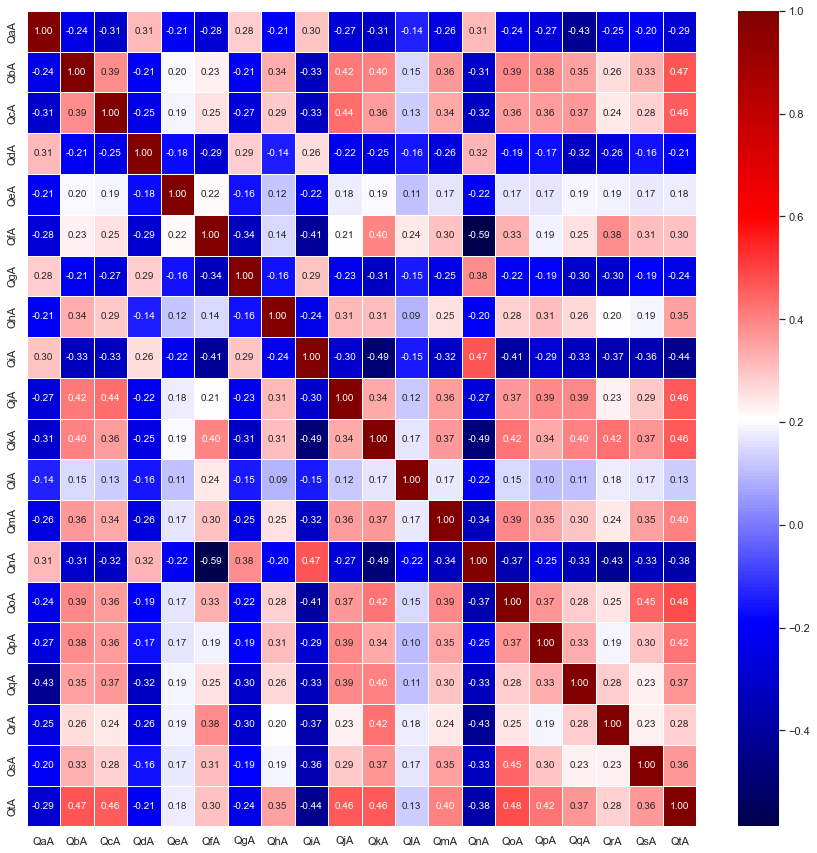

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train[Answers].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='seismic')

- 나머지 음의 방향인 것들도 모두 reverse 처리

In [9]:
reverse = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for r in reverse: 
        train[r] = 6 - train[r]
        test[r] = 6 - test[r]

<AxesSubplot:>

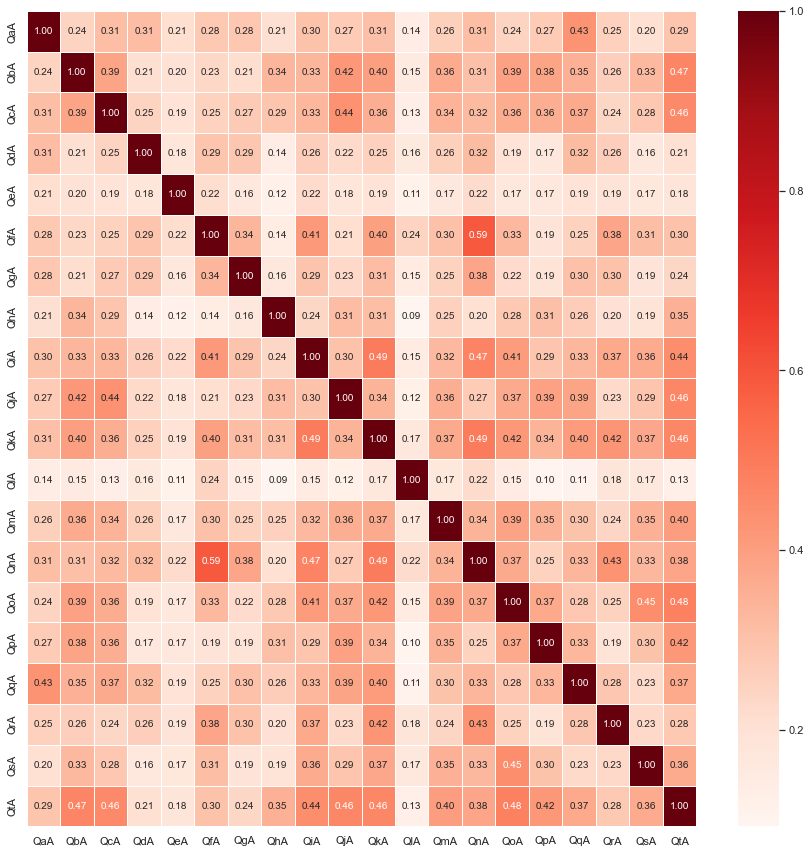

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train[Answers].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

In [11]:
train['Mach_score'] = train[Answers].mean(axis = 1)
test['Mach_score'] = test[Answers].mean(axis = 1)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

def bar_chart(feature):
    yes = train[train['voted']==1][feature].value_counts()
    no = train[train['voted']==2][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes','No']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

# Feature : tp0106, tp0207, tp0308, tp0409, tp0510 (관련있는 tp 끼리 묶음)

In [13]:
Tp = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05',
             'tp06', 'tp07', 'tp08', 'tp09', 'tp10']

<AxesSubplot:>

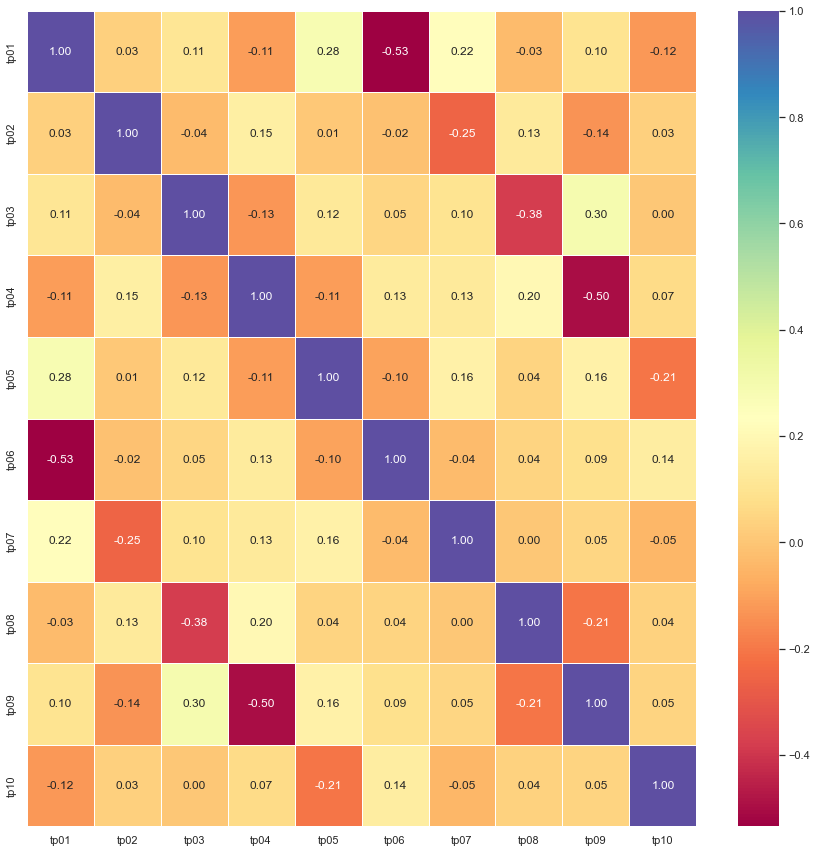

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train[Tp].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Spectral')

- tp01, tp06 이 반대 성향
- tp02, tp07 이 반대 성향
- tp03, tp08 이 반대 성향
- tp04, tp09 이 반대 성향
- tp05, tp10 이 반대 성향

- tp06 ~ tp10을 reverse 시킨 후 tp01 ~ tp05와 매칭하여 새로운 feature 생성

In [15]:
reverse = ["tp06", "tp07", "tp08", "tp09", "tp10"]
for r in reverse: 
        train[r] = 7 - train[r]
        test[r] = 7 - test[r]
        
tp0106=['tp01', 'tp06']
tp0207=['tp02', 'tp07']
tp0308=['tp03', 'tp08']
tp0409=['tp04', 'tp09']
tp0510=['tp05', 'tp10']
train['tp0106'] = train[tp0106].sum(axis = 1)
train['tp0207'] = train[tp0207].sum(axis = 1)
train['tp0308'] = train[tp0308].sum(axis = 1)
train['tp0409'] = train[tp0409].sum(axis = 1)
train['tp0510'] = train[tp0510].sum(axis = 1)
temp=['tp0106', 'tp0207', 'tp0308','tp0409', 'tp0510']

test['tp0106'] = test[tp0106].sum(axis = 1)
test['tp0207'] = test[tp0207].sum(axis = 1)
test['tp0308'] = test[tp0308].sum(axis = 1)
test['tp0409'] = test[tp0409].sum(axis = 1)
test['tp0510'] = test[tp0510].sum(axis = 1)
train[temp].corr()

,tp0106,tp0207,tp0308,tp0409,tp0510
tp0106,1.000000,-0.073595,0.046631,-0.088461,0.232883
tp0207,-0.073595,1.000000,-0.098955,0.078094,-0.089794
tp0308,0.046631,-0.098955,1.000000,-0.287424,0.039292
tp0409,-0.088461,0.078094,-0.287424,1.000000,-0.102776
tp0510,0.232883,-0.089794,0.039292,-0.102776,1.000000


In [16]:
tp_drop_score=11
train = train.drop(train[train.tp0106 > tp_drop_score].index)
test = test.drop(test[test.tp0106 > tp_drop_score].index)
train = train.drop(train[train.tp0207 > tp_drop_score].index)
test = test.drop(test[test.tp0207 > tp_drop_score].index)
train = train.drop(train[train.tp0308 > tp_drop_score].index)
test = test.drop(test[test.tp0308 > tp_drop_score].index)
train = train.drop(train[train.tp0409 > tp_drop_score].index)
test = test.drop(test[test.tp0409 > tp_drop_score].index)
train = train.drop(train[train.tp0510 > tp_drop_score].index)
test = test.drop(test[test.tp0510 > tp_drop_score].index)

# wr_(1~13) : 설문자의 어휘 능력 (실존하는 해당 단어의 정의를 앎)

In [17]:
import numpy as np
wr=['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']
train['wr']=train[wr].mean(axis=1)
test['wr']=test[wr].mean(axis=1)
train['wr']= np.where(train['wr'] >= 0.5, 1, 0)
test['wr']= np.where(test['wr'] >= 0.5, 1, 0)

# wf_(1~3) : 설문자의 어휘 능력 (허구인 단어의 정의를 앎)

In [18]:
wf=['wf_01', 'wf_02', 'wf_03']
train['wf']=train[wf].mean(axis=1)
train['wf']= np.where(train['wf'] <= 0.0, 1, 0)

test['wf']=test[wf].mean(axis=1)
test['wf']= np.where(test['wf'] <= 0.0, 1, 0)

# Feature : Word_score (설문자의 어휘 능력 스코어)

In [19]:
Word=['wr', 'wf']
train['Word_score']=train[Word].mean(axis=1)
train['Word_score']= np.where(train['Word_score'] == 1.0, 1, 0)

test['Word_score']=test[Word].mean(axis=1)
test['Word_score']= np.where(test['Word_score'] == 1.0, 1, 0)

# 1. 언어능력과 투표의 상관성 = X

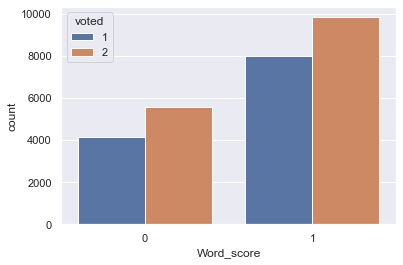

In [20]:
sns.countplot(x="Word_score",hue=train['voted'], data=train)
plt.show()

# 2. 종교와 투표의 상관성 = X

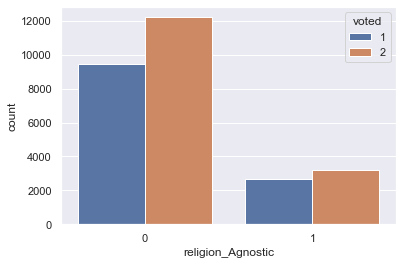

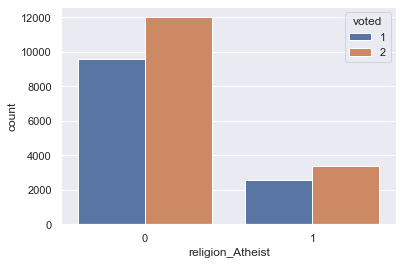

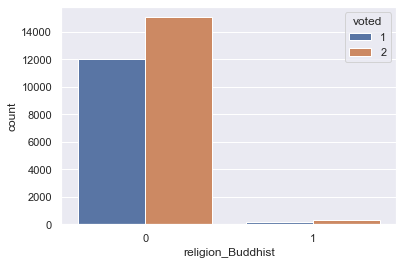

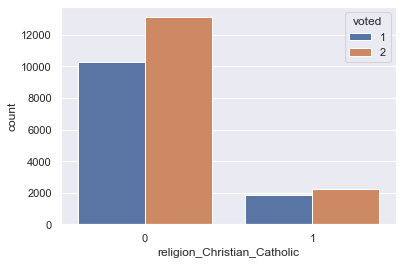

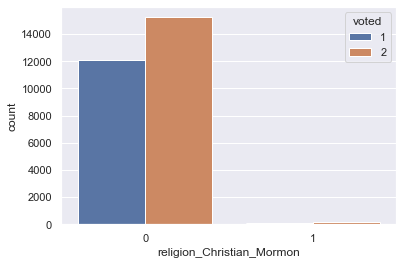

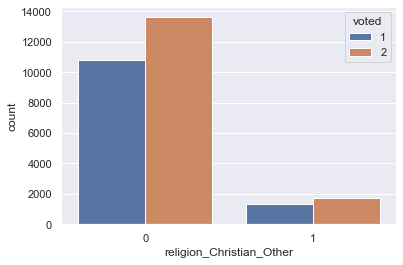

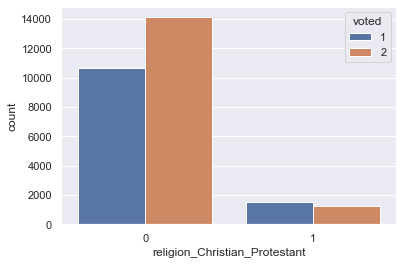

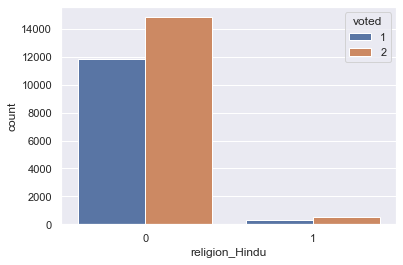

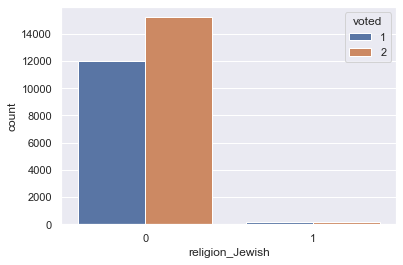

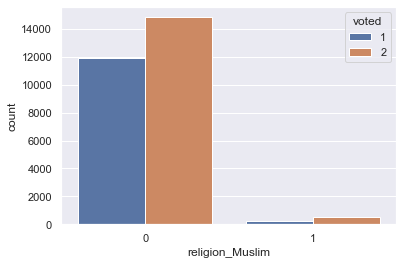

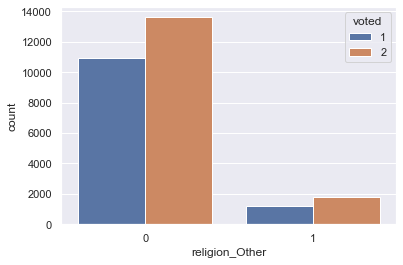

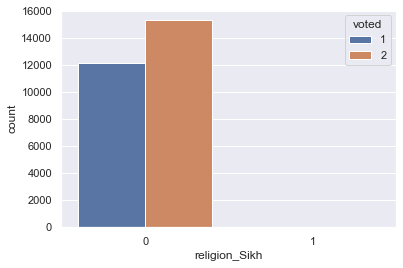

In [21]:
religion=['religion_Agnostic','religion_Atheist', 'religion_Buddhist','religion_Christian_Catholic','religion_Christian_Mormon',
              'religion_Christian_Other', 'religion_Christian_Protestant','religion_Hindu','religion_Jewish','religion_Muslim',
              'religion_Other','religion_Sikh']
for i in religion:
    sns.countplot(x=i,hue=train['voted'], data=train)
    plt.show()

# 3. 성향소개(tp)와 투표의 상관성 = X

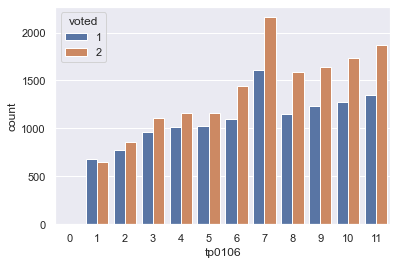

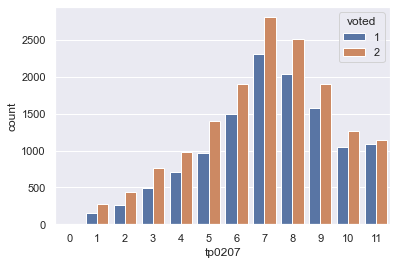

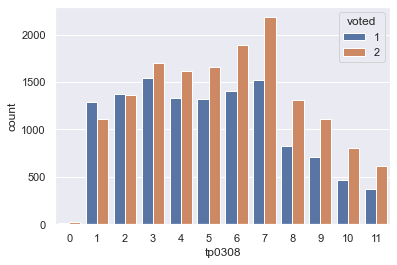

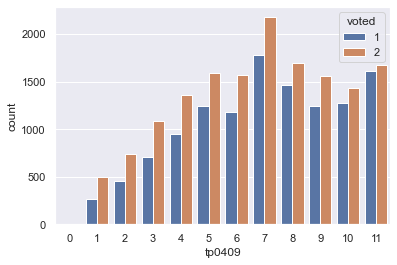

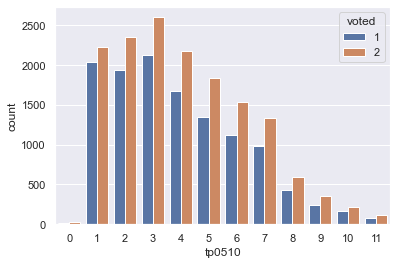

In [22]:
temp=['tp0106', 'tp0207', 'tp0308','tp0409', 'tp0510']
for i in temp:
    sns.countplot(x=i,hue=train['voted'], data=train)
    plt.show()


# 가설 4. 연령대와 투표의 상관성 = O

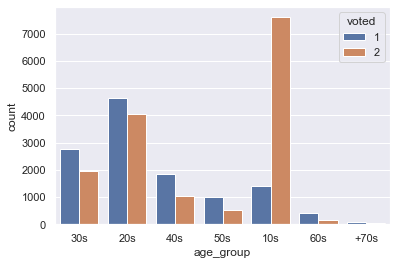

In [23]:
sns.countplot(x='age_group',hue=train['voted'], data=train)
plt.show()

# 가설 5. 교육수준과 투표의 상관성 = O

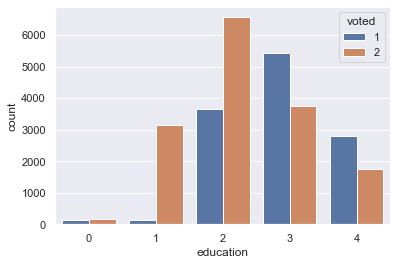

In [24]:
sns.countplot(x='education',hue=train['voted'], data=train)
plt.show()

# 가설 6. 성별과 투표의 상관성 = X

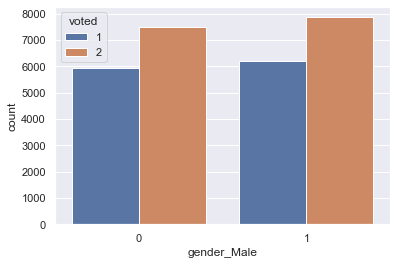

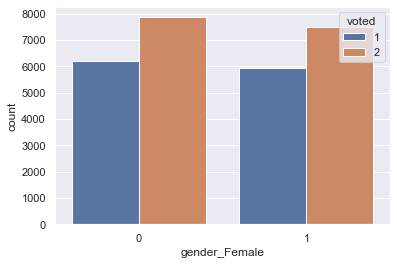

In [25]:
gender=['gender_Male', 'gender_Female']
for i in gender:
    sns.countplot(x=i,hue=train['voted'], data=train)
    plt.show()

# 가설 7. 결혼여부와 투표의 상관성 = X
- 2인 가족일 경우 투표율이 높게 나올 수 있음
- 3인 이상 가족일 경우부터는 자녀의 투표여부도 포함 되기 때문에 유의미한 지표가 아닐수도?

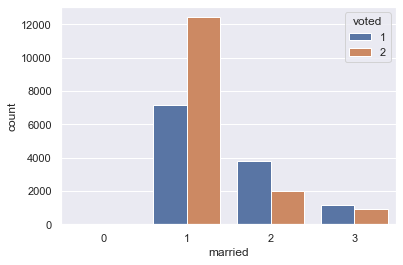

In [26]:
sns.countplot(x='married',hue=train['voted'], data=train)
plt.show()

# 나머지 feature들 drop

In [27]:
left_feature=['QaA', 'QbA', 'QcA', 'QdA', 'QeA','QfA', 'QgA', 'QhA', 'QiA', 'QjA', 'QkA', 'QlA', 'QmA', 'QnA', 'QoA','QpA', 
              'QqA', 'QrA', 'QsA', 'QtA','QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 
              'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE','engnat','tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06',
              'tp07', 'tp08', 'tp09', 'tp10','gender_Male', 'gender_Female','hand','race_Arab', 'race_Asian','race_Black','married',
              'race_Indigenous Australian','race_Native American','race_Other','race_White','religion_Agnostic','religion_Atheist', 
              'religion_Buddhist','religion_Christian_Catholic','religion_Christian_Mormon', 'religion_Christian_Other', 
              'religion_Christian_Protestant', 'religion_Hindu','religion_Jewish','religion_Muslim', 'religion_Other','religion_Sikh',
              'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wf_01', 'wf_02', 'wf_03','wr_10', 
              'wr_11', 'wr_12', 'wr_13', 'wr', 'wf', 'Word_score']

train = train.drop(left_feature, axis = 1)
test = test.drop(left_feature, axis = 1)

# Model 생성

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [29]:
train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

# 사용한 feature 목록

In [30]:
for i in train:
    print(i)

age_group
education
familysize
urban
voted
Mach_score
tp0106
tp0207
tp0308
tp0409
tp0510


# Auto ML

In [31]:
from pycaret.classification import *
clf = setup(data = train, target = 'voted')

,Description,Value
0,Session id,4943
1,Target,voted
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(27550, 11)"
5,Transformed data shape,"(27550, 11)"
6,Transformed train set shape,"(19284, 11)"
7,Transformed test set shape,"(8266, 11)"
8,Numeric features,9
9,Categorical features,1


# 모델 학습 및 비교 (Train models and compare)

In [32]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6725,0.7394,0.6272,0.7460,0.6814,0.3497,0.3553,0.5230
lda,Linear Discriminant Analysis,0.6723,0.7394,0.6045,0.7595,0.6731,0.3529,0.3623,0.0260
nb,Naive Bayes,0.6705,0.7353,0.5801,0.7734,0.6628,0.3533,0.3674,0.0200
qda,Quadratic Discriminant Analysis,0.6688,0.7331,0.5192,0.8221,0.6364,0.3596,0.3920,0.0210
et,Extra Trees Classifier,0.6665,0.7258,0.6052,0.7498,0.6692,0.3405,0.3489,0.1200
rf,Random Forest Classifier,0.6628,0.6886,0.5076,0.8222,0.6270,0.3490,0.3839,0.1160
dt,Decision Tree Classifier,0.6647,0.6861,0.5024,0.8325,0.6259,0.3537,0.3919,0.0210
lightgbm,Light Gradient Boosting Machine,0.6647,0.6749,0.5024,0.8325,0.6259,0.3537,0.3919,0.0480
ada,Ada Boost Classifier,0.6642,0.6737,0.5033,0.8303,0.6260,0.3526,0.3901,0.0710
gbc,Gradient Boosting Classifier,0.6647,0.6716,0.5024,0.8325,0.6259,0.3537,0.3919,0.1540


# 모델 앙상블 (Model Ensemble)

In [33]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6687,0.7374,0.5956,0.7592,0.6675,0.3468,0.3569
1,0.6674,0.7397,0.5780,0.7690,0.6600,0.3470,0.3606
2,0.6715,0.7360,0.5896,0.7683,0.6672,0.3538,0.3660
3,0.6788,0.7455,0.6080,0.7682,0.6788,0.3661,0.3762
4,0.6727,0.7347,0.6010,0.7625,0.6722,0.3545,0.3645
Mean,0.6718,0.7386,0.5944,0.7654,0.6691,0.3536,0.3648
Std,0.0040,0.0038,0.0102,0.0039,0.0062,0.0070,0.0065


# 모델 예측 (Prediction)

In [34]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6724,0.7357,0,0,0,0.3554,0.3675


# 전체 데이터에 대한 재학습 (Re-training the model on whole data)

In [35]:
final_model = finalize_model(blended)

In [36]:
pred_holdout = predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6731,0.7361,0,0,0,0.3568,0.3689


# 대회용 test set에 대한 예측 (Predicting on test set for the competition)

In [37]:
print("train :",train.shape)
print("test :",test.shape)

train : (27550, 11)
test : (6920, 10)


In [38]:
predictions = predict_model(final_model, data = test)
predictions

,age_group,education,familysize,urban,Mach_score,tp0106,tp0207,tp0308,tp0409,tp0510,Label,Score
0,0.842642,2.0,3.0,2.0,2.45,7.0,6.0,5.0,7.0,4.0,2,0.8612
1,0.842642,2.0,2.0,3.0,2.80,7.0,7.0,7.0,7.0,7.0,2,0.8897
5,0.464943,4.0,3.0,2.0,3.05,7.0,8.0,1.0,10.0,2.0,1,0.7472
6,0.842642,2.0,1.0,3.0,4.70,6.0,5.0,6.0,8.0,3.0,2,0.8873
7,0.464943,3.0,2.0,3.0,4.80,1.0,10.0,10.0,9.0,1.0,1,0.5683
...,...,...,...,...,...,...,...,...,...,...,...,...
11371,0.842642,1.0,1.0,2.0,3.00,6.0,7.0,7.0,8.0,6.0,2,0.9087
11377,0.361293,3.0,4.0,3.0,3.80,4.0,8.0,4.0,10.0,5.0,1,0.6874
11378,0.464943,3.0,3.0,0.0,3.20,4.0,6.0,7.0,6.0,2.0,1,0.7058
11379,0.842642,2.0,1.0,2.0,4.55,3.0,7.0,9.0,1.0,3.0,2,0.8878


In [39]:
submission= pd.read_csv('./sample_submission.csv')

In [40]:
submission['voted'] = predictions['Score']

In [41]:
submission.to_csv('submission_proba.csv', index = False)

In [42]:
submission['voted'].describe()

count    6920.000000
mean        0.722706
std         0.133322
min         0.500200
25%         0.606575
50%         0.706000
75%         0.865025
max         0.957500
Name: voted, dtype: float64

In [43]:
submission['V']= np.where(submission['voted'] >= 0.699674, 1, 0)

In [44]:
submission['V']

0        1
1        1
2        0
3        0
4        0
        ..
11378    1
11379    1
11380    0
11381    0
11382    0
Name: V, Length: 11383, dtype: int32

In [45]:
submission['V'].value_counts()

0    7815
1    3568
Name: V, dtype: int64